## 1-2 ) Chargement du dataset et Nettoyage + standardisation des variables numériques.

In [ ]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
#df['MedHouseVal'] = ds.target

if df.isnull().values.any():
    # Imputation des valeurs manquantes (par la moyenne)
    df.fillna(df.mean(), inplace=True)
else:
    print("Aucune valeur manquante. Rien à faire.")

df.head(10)




Aucune valeur manquante. Rien à faire.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


## 3 ) EDA

Statistiques descriptives

In [ ]:
print(df.describe())

Statistiques descriptives: 
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%       

Histogrammes :

Histogrammes :




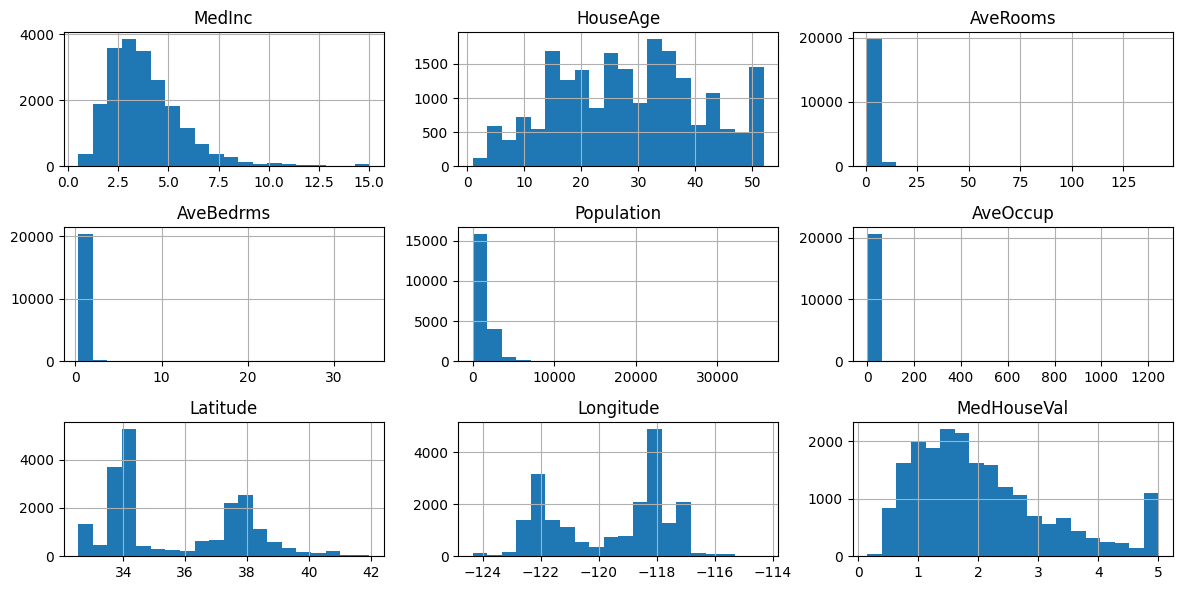

In [ ]:
import matplotlib.pyplot as plt

print('Histogrammes :')
print('\n')
df.hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

BoxPlots:

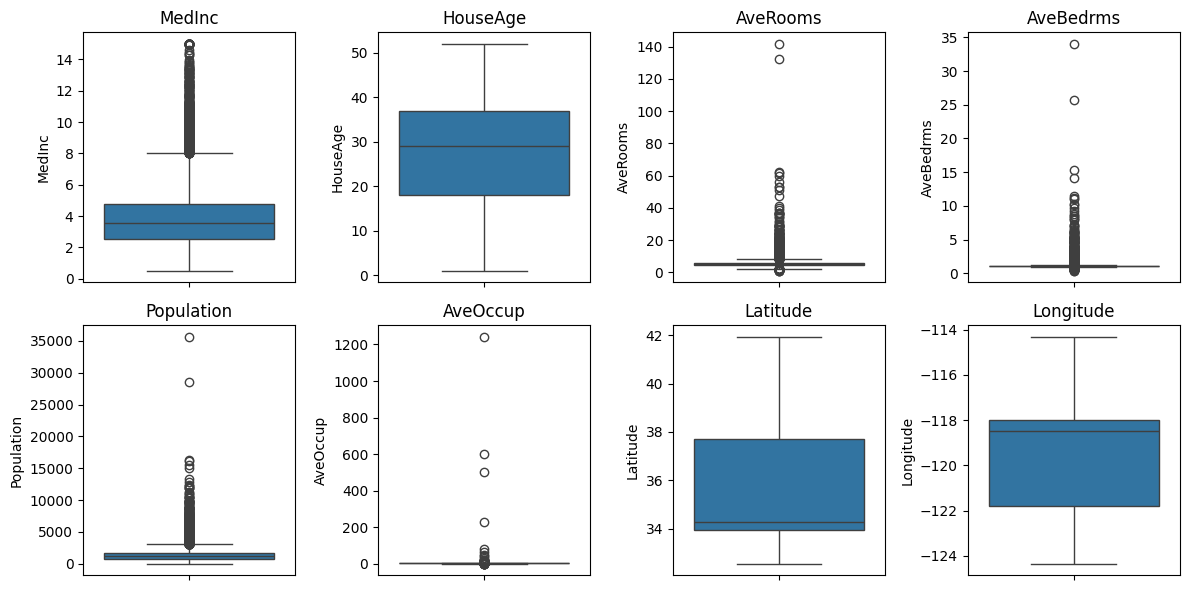

In [ ]:
import seaborn as sns


# Liste des donnés (sans la cible)
df["MedHouseVal"] = ds.target
features = df.drop(columns=["MedHouseVal"]).columns

plt.figure(figsize=(12, 6))
for i, column in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Scatter-plots  MedHouseVal vs variables clés

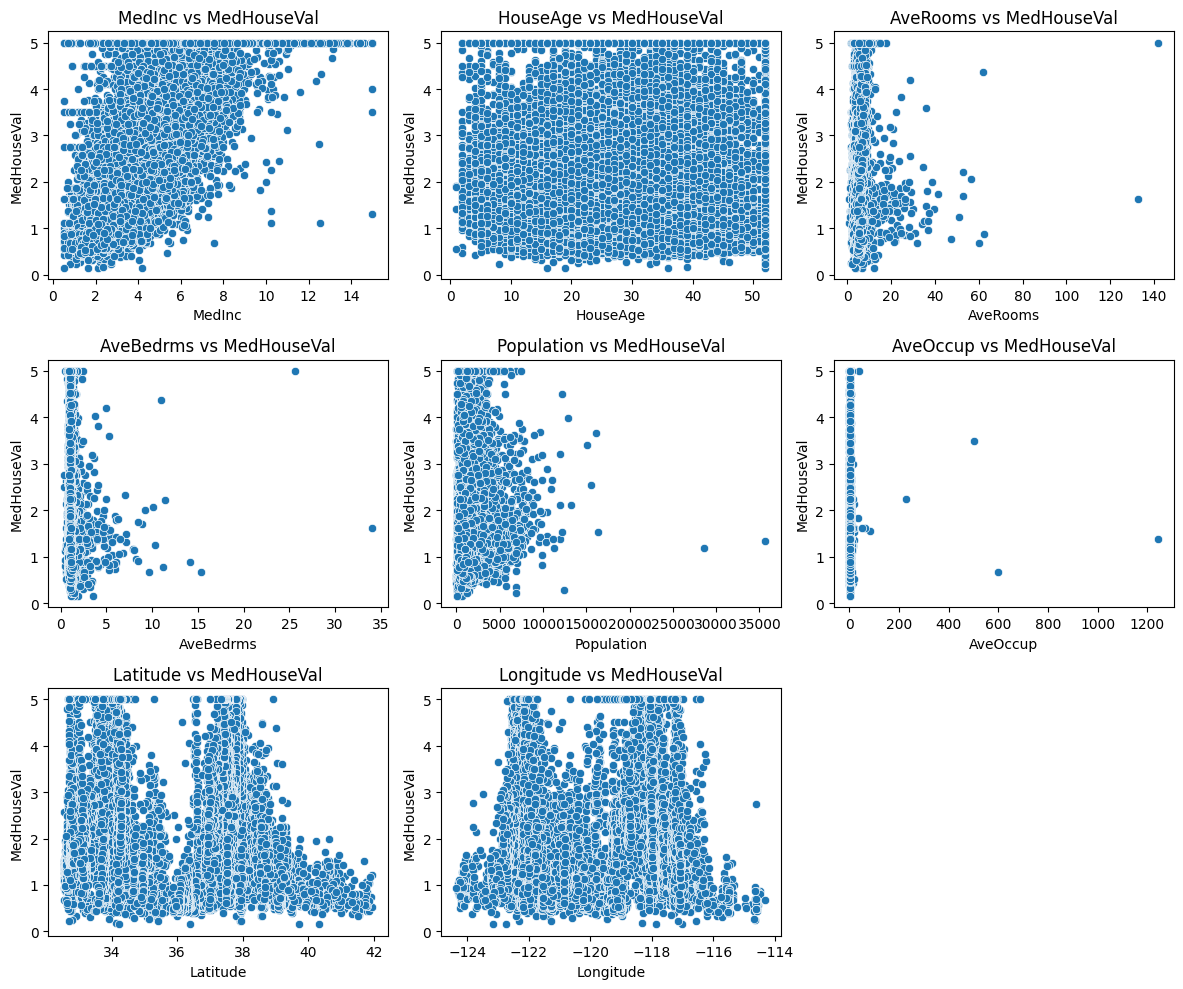

In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df["MedHouseVal"])
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
    plt.title(f"{col} vs MedHouseVal")


plt.tight_layout()
plt.show()

Matrice de corrélation

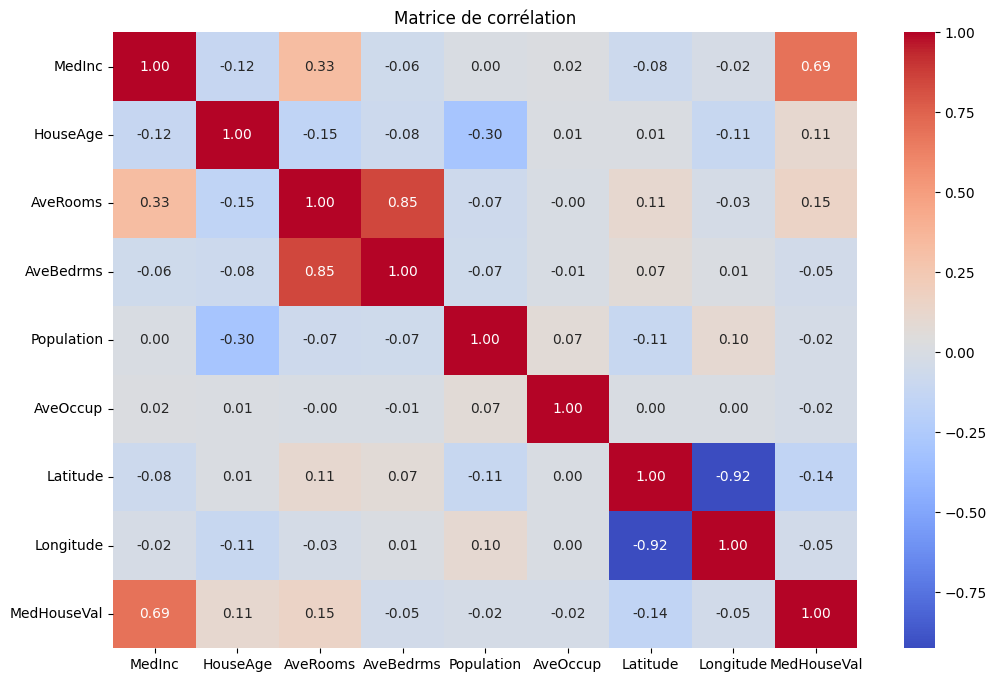

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()